In [186]:
# TEST_IMAGE_PATH = './images/image_ఠ.png'
# TEST_IMAGE_PATH = './images/image_ఘ.png'
# TEST_IMAGE_PATH = './images/image_అః.png'
# TEST_IMAGE_PATH = './images/image_కో.png'
# TEST_IMAGE_PATH = './images/image_క్ల.png'
TEST_IMAGE_PATH = './images/image_వ్యక్తి.png'
# TEST_IMAGE_PATH = './images/image_క్క.png'
# TEST_IMAGE_PATH = './images/image_W.png'
# TEST_IMAGE_PATH = './images/image_G.png'
# TEST_IMAGE_PATH = './images/image_H.png'
# TEST_IMAGE_PATH = './test_images/telugu.png'
# TEST_IMAGE_PATH = './test_images/cree.png'
# TEST_IMAGE_PATH = './test_images/chinese.png'
# TEST_IMAGE_PATH = './test_images/russian.png'
# TEST_IMAGE_PATH = './test_images/hebrew.png'

In [187]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [188]:
TEST_IMAGE_ORIGINAL = cv2.imread(TEST_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

In [189]:
# display image
def display_image(image, title='Image'):
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

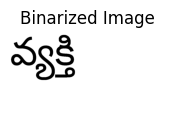

In [190]:
def binarize_image(image):
	_, binarized = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
	return binarized

binarized = binarize_image(TEST_IMAGE_ORIGINAL)
display_image(binarized, 'Binarized Image')

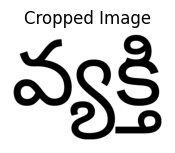

In [191]:
def crop_to_bounding_box(image, padding=10):
    # Invert the grayscale image to make black pixels white (255)
    inverted_gray = cv2.bitwise_not(image)

    # Apply a binary threshold to the inverted grayscale image
    _, binary = cv2.threshold(inverted_gray, 1, 255, cv2.THRESH_BINARY)

    # Find coordinates of all non-zero pixels
    coords = np.column_stack(np.where(binary > 0))

    # Get the bounding box coordinates
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)

    # Crop the bounding box from the original image
    cropped_image = image[x_min:x_max, y_min:y_max]
    # cropped_image = image[x_min - padding:x_max + padding, y_min - padding:y_max + padding]

    # pad image
    padded_image = cv2.copyMakeBorder(cropped_image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)

    return padded_image

cropped = crop_to_bounding_box(TEST_IMAGE_ORIGINAL)
display_image(cropped, title='Cropped Image')

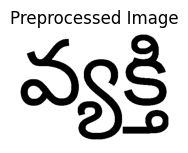

In [192]:
def preprocess_image(image):
	# Binarize the image
	binarized = binarize_image(image)

	# Crop the image to its bounding box
	cropped = crop_to_bounding_box(binarized)

	return cropped

TEST_IMAGE = preprocess_image(TEST_IMAGE_ORIGINAL)
display_image(TEST_IMAGE, title='Preprocessed Image')

disconnected components

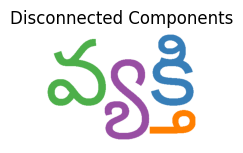

Number of disconnected components: 4


In [193]:
# count disconnected components
def disconnected_components(image):
	# Invert the image to make black pixels white (255)
	inverted = cv2.bitwise_not(image)

	# Find connected components
	num_labels, labels = cv2.connectedComponents(inverted)

	# show connected components
	image_with_components = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
	from matplotlib.cm import Set1 as color_map
	for label in range(1, num_labels):
		image_with_components[labels == label] = np.array(color_map(label)[:3]) * 255
	display_image(image_with_components, title='Disconnected Components')

	return num_labels - 1

print(f'Number of disconnected components: {disconnected_components(TEST_IMAGE)}')

perimetric complexity

Number of contours: 7


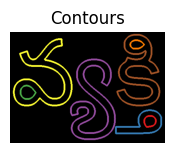

Area: 36561.00 sq. px
Perimeter: 4017.15 px
Perimetric Complexity: 35.1243


In [194]:
def perimetric_complexity(image):
    # Invert the image to make black pixels white (255)
    image = cv2.bitwise_not(image)

    # Find the contours of the character (foreground)
    contours, _ = cv2.findContours(image, cv2.RETR_LIST,
                                   cv2.CHAIN_APPROX_SIMPLE)

    print(f'Number of contours: {len(contours)}')

    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR) * 0

    # Highlight the skeleton with different colors
    from matplotlib.cm import Set1 as color_map
    for i, contour in enumerate(contours):
        color = np.array(color_map(i)[:3]) * 255
        cv2.drawContours(image_with_contours, [contour], -1, color, 3)

    display_image(image_with_contours, title='Contours')

    # Calculate the perimeter (P) of the character
    perimeter = 0
    for contour in contours:
        perimeter += cv2.arcLength(contour, True)

    # Calculate the area (A) of the character
    # area = 0
    # for contour in contours:
    #     area += cv2.contourArea(contour)

    area = np.sum(image == 255)

    print(f'Area: {area:.2f} sq. px')
    print(f'Perimeter: {perimeter:.2f} px')

    # Calculate the Perimetric Complexity (PC)
    if area != 0:
        perimetric_complexity = (perimeter**2) / (area * 4 * np.pi)
    else:
        perimetric_complexity = float('inf')

    return perimetric_complexity


print(f'Perimetric Complexity: {perimetric_complexity(TEST_IMAGE):.4f}')

simple features

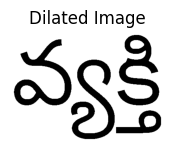

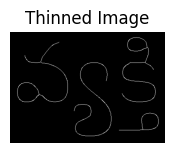

In [195]:
# median thinning


def thinning(image):
    # Invert the image to make black pixels white (255)
    inverted = cv2.bitwise_not(image)

    # Apply a binary threshold to the inverted image
    _, binary = cv2.threshold(inverted, 1, 255, cv2.THRESH_BINARY)

    # Apply the thinning algorithm
    skeleton = cv2.ximgproc.thinning(
        binary, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

    return skeleton


# dilate the image
def dilate_image(image, kernel_size=3):
    # dilate the image
    dilated = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

    return dilated


display_image(dilate_image(TEST_IMAGE), title='Dilated Image')

TEST_IMAGE_THINNED = thinning(dilate_image(TEST_IMAGE))
display_image(TEST_IMAGE_THINNED, title='Thinned Image')

In [196]:
# def smooth_contours(contours):
#     # # Smooth the contours using a polynomial approximation
#     # smooth_contours = []
#     # for contour in contours:
#     # 	contour = contour.squeeze()
#     # 	x, y = contour.T
#     # 	t = np.arange(len(contour))
#     # 	x_t = np.poly1d(np.polyfit(t, x, 3))(t)
#     # 	y_t = np.poly1d(np.polyfit(t, y, 3))(t)
#     # 	smooth_contours.append(np.column_stack([x_t, y_t]).astype(np.int32))

#     # return smooth_contours
#     from scipy.interpolate import splprep, splev

#     smooth_contours = []
#     for contour in contours:
#         x, y = contour.T
#         # Convert from numpy arrays to normal arrays
#         x = x.tolist()[0]
#         y = y.tolist()[0]
#         # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splprep.html
#         tck, u = splprep([x, y], u=None, s=1.0, per=1)
#         # https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linspace.html
#         u_new = numpy.linspace(u.min(), u.max(), 25)
#         # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splev.html
#         x_new, y_new = splev(u_new, tck, der=0)
#         # Convert it back to numpy format for opencv to be able to display it
#         res_array = [[[int(i[0]), int(i[1])]] for i in zip(x_new, y_new)]
#         smooth_contours.append(numpy.asarray(res_array, dtype=numpy.int32))
#     return smooth_contours


def smooth_contours(contours, shape=(512, 512), kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))):
    if not contours:
        return contours

    mask = np.zeros(shape, dtype=np.uint8)
    cv2.drawContours(mask, contours, -1, 255, -1)

    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    blur = cv2.GaussianBlur(mask, (15,15), 0)
    thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)[-1]

    # contours = contours.get_contours(thresh)
    return contours

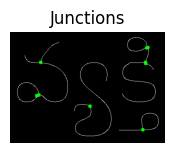

Number of junctions: 9


In [197]:
def get_junctions(image, draw=False):
    blur = cv2.GaussianBlur(image, (3, 3), 0)
    thresh = cv2.threshold(blur, 0, 255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Find horizonal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
    horizontal = cv2.morphologyEx(thresh,
                                  cv2.MORPH_OPEN,
                                  horizontal_kernel,
                                  iterations=1)

    # Find vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
    vertical = cv2.morphologyEx(thresh,
                                cv2.MORPH_OPEN,
                                vertical_kernel,
                                iterations=1)
    # convert to BGR for display
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Find joint intersections then the centroid of each joint
    joints = cv2.bitwise_and(horizontal, vertical)
    cnts = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = smooth_contours(cnts)

    junctions = []

    for c in cnts:
        # Find centroid and draw center point
        x, y, w, h = cv2.boundingRect(c)
        centroid, coord, area = cv2.minAreaRect(c)
        cx, cy = int(centroid[0]), int(centroid[1])
        junctions.append((cx, cy))

    # # merge close junctions
    # junctions = np.array(junctions)
    # junctions = cv2.approxPolyDP(junctions, 2, False)
    # junctions = junctions.reshape(-1, 2)

    for cx, cy in junctions:
        cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

    if draw:
        display_image(image, title='Junctions')

    return junctions


test_image = TEST_IMAGE.copy()
print(f'Number of junctions: {len(get_junctions(TEST_IMAGE_THINNED, draw=True))}')

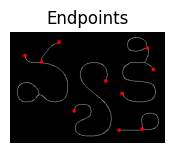

Number of endpoints: 10


In [198]:
def get_endpoints(image, draw=False):
    blur = cv2.GaussianBlur(image, (3, 3), 0)
    thresh = cv2.threshold(blur, 0, 255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # convert to BGR for display
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Find endpoints
    corners = cv2.goodFeaturesToTrack(thresh, 100, 0.5, 30)
    corners = np.intp(corners)

    endpoints = []
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image, (x, y), 5, (255, 0, 0), -1)
        endpoints.append((x, y))

    if draw:
        display_image(image, title='Endpoints')

    return endpoints


test_image = TEST_IMAGE.copy()
print(f'Number of endpoints: {len(get_endpoints(TEST_IMAGE_THINNED, draw=True))}')


In [199]:
def get_corners_in_components(image):
    # Convert the image to a color image
    colored_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # get components
    # Invert the image to make black pixels white (255)
    inverted = cv2.bitwise_not(image)

    # Find connected components
    num_labels, labels = cv2.connectedComponents(inverted)

    # show connected components
    image_with_components = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    from matplotlib.cm import Set1 as color_map
    for label in range(1, num_labels):
        image_with_components[labels == label] = np.array(
            color_map(label)[:3]) * 255
    display_image(image_with_components, title='Disconnected Components')

    skeleton = thinning(dilate_image(image))
    junctions = get_junctions(skeleton)

    corners_in_components = [[] for _ in range(num_labels)]
    for x, y in junctions:
        # determine component index
        for i in range(1, num_labels):
            if labels[y, x] == i:
                corners_in_components[i].append((x, y))
                break

    # remove background component
    corners_in_components = corners_in_components[1:]

    # merge close points
    CLOSENESS_THRESHOLD = 20
    for i in range(len(corners_in_components)):
        new_points = []
        for point in corners_in_components[i]:
            # check if point is close to any other point
            close = False
            for new_point in new_points:
                if np.linalg.norm(np.array(point) - np.array(new_point)) < CLOSENESS_THRESHOLD:
                    close = True
                    break
            if not close:
                new_points.append(point)
                cv2.circle(colored_image, (point[0], point[1]), 5, (0, 255, 0), -1)
        corners_in_components[i] = new_points

    print(
        f'Corners in components: {[len(corners) for corners in corners_in_components]}'
    )
    display_image(colored_image, title='Connecting Points')

    return corners_in_components

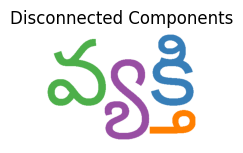

Corners in components: [2, 2, 1, 1]


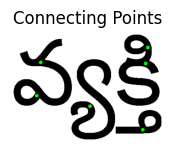

Simple Features: 10


In [200]:
def simple_features(image):
    corners_in_components = get_corners_in_components(image)
    # sum over n+1 for each contour
    SF = 0
    for corners_in_component in corners_in_components:
        SF += len(corners_in_component) + 1
    return SF


print(f'Simple Features: {simple_features(TEST_IMAGE)}')

connected points

In [201]:
# VAI1 = './test_images/vai1.png'
# VAI2 = './test_images/vai2.png'

# VAI1_IMAGE = binarize_image(cv2.imread(VAI1, cv2.IMREAD_GRAYSCALE))
# VAI2_IMAGE = binarize_image(cv2.imread(VAI2, cv2.IMREAD_GRAYSCALE))

# display_image(VAI1_IMAGE, title='VAI1')
# display_image(VAI2_IMAGE, title='VAI2')

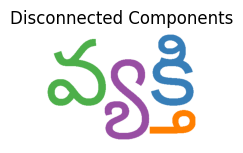

Corners in components: [2, 2, 1, 1]


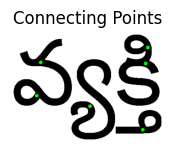

Connected Points: 6


In [202]:
def connected_points(image):
    corners_in_components = get_corners_in_components(image)
    return sum(map(len, corners_in_components))

print(f'Connected Points: {connected_points(TEST_IMAGE)}')

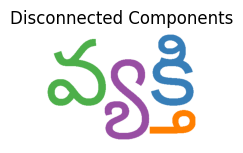

Corners in components: [2, 2, 1, 1]


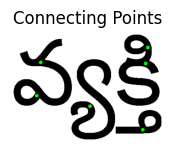

Connected Points: 6
Simple Features: 10


In [203]:
def get_cp_sf(image):
	corners_in_components = get_corners_in_components(image)
	cp = sum(map(len, corners_in_components))
	sf = sum(map(lambda corners: len(corners) + 1, corners_in_components))
	print(f'Connected Points: {cp}')
	print(f'Simple Features: {sf}')
	return cp, sf

cp, sf = get_cp_sf(TEST_IMAGE)